In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
'''
Demographic data:
    Region, Age, marital

Target field: custcat
    Possible values:
        1 - Basic Service
        2 - E-service
        3 - Plus Service
        4 - Total Service
'''

In [3]:
# Download Data
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv;

--2020-05-27 12:49:17--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K  --.-KB/s    in 0.03s   

2020-05-27 12:49:17 (1.08 MB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [4]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3

In [5]:
df['custcat'].value_counts() # how many in each class

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a199e9ed0>]],
      dtype=object)

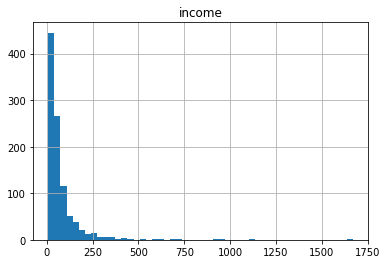

In [6]:
df.hist(column='income', bins=50)

In [7]:
# Feature Set
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [13]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5];

In [12]:
y = df['custcat'].values
y[0:5];

In [11]:
# Normalize Data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5];

In [14]:
# Train Test Split
    # Out of Sample Accuracy: percentage of correct predictions model makes on data that the model has not been trained on
    # Train and test on same dataset will have low out-of-sample accuracy because likely over-fit
    #Train/Test split gives higher out of sample accuracy

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


# Classification

## K Nearest Neighbors

In [15]:
# Import Library
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Training, where k =4
k = 6
    #Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [20]:
# Predicting
yhat = neigh.predict(X_test)
yhat[0:5]

array([4, 4, 1, 3, 4])

In [21]:
# Accuracy evaluation
    # Jaccard_similarity_score function: calculates how closely actual labels and predicted labels are matched in the test set.
    
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.495
Test set Accuracy:  0.295


In [22]:
# choose right value of K
    # reserve a part of your data for testing the accuracy of the model.
    # choose k =1
    # use training part for modeling
    # calculate accuracy of prediction using all samples in test set
    # repreat proce increasing the k, and see which works best.

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.275, 0.31 , 0.275, 0.26 , 0.3  , 0.295, 0.35 , 0.33 , 0.32 ])

In [23]:
# Plot model accuracy for different K-values
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [24]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.35 with k= 7
